In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
%matplotlib inline

In [2]:
data = pd.read_csv("updatedDatasets/Update3.csv")

In [3]:
dataT = data[data['IDE'].notna()]

In [4]:
dataT.head(1)

,Unnamed: 0,Unnamed: 0.1,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,...,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Gender,HighestEducationParents,Salary,ExpectedSalary,Assess_Scoring
0,0,0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,...,NaN,iOS,iOS,Atom; Xcode,Turn on some music,Male,High school,NaN,NaN,31.5


#  [IDE] Segregation, Cleaning and Analysis

In [5]:
A = {}
J = list()
for i in dataT['IDE']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [6]:
A

{'Atom': 6540,
 'Xcode': 3850,
 'Notepad++': 12681,
 'Vim': 9679,
 'PyCharm': 3268,
 'RubyMine': 613,
 'Visual Studio': 13677,
 'Visual Studio Code': 6826,
 'Sublime Text': 9978,
 'IntelliJ': 7418,
 'TextMate': 439,
 'IPython / Jupyter': 1914,
 'NetBeans': 2909,
 'Emacs': 1956,
 'Coda': 227,
 'PHPStorm': 2965,
 'Android Studio': 5953,
 'RStudio': 996,
 'Komodo': 254,
 'Eclipse': 7899,
 'Light Table': 70,
 'Zend': 156}

In [7]:
D1=pd.Series(A,name='IDE Users')

In [8]:
D1 =D1.to_frame()

In [9]:
D1=D1.reset_index(level=0)

In [10]:
D1.columns=['IDE','Users']

In [11]:
D1 = D1.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Visual Studio'),
  Text(1, 0, 'Notepad++'),
  Text(2, 0, 'Sublime Text'),
  Text(3, 0, 'Vim'),
  Text(4, 0, 'Eclipse'),
  Text(5, 0, 'IntelliJ'),
  Text(6, 0, 'Visual Studio Code'),
  Text(7, 0, 'Atom'),
  Text(8, 0, 'Android Studio'),
  Text(9, 0, 'Xcode'),
  Text(10, 0, 'PyCharm'),
  Text(11, 0, 'PHPStorm'),
  Text(12, 0, 'NetBeans'),
  Text(13, 0, 'Emacs'),
  Text(14, 0, 'IPython / Jupyter'),
  Text(15, 0, 'RStudio'),
  Text(16, 0, 'RubyMine'),
  Text(17, 0, 'TextMate'),
  Text(18, 0, 'Komodo'),
  Text(19, 0, 'Coda'),
  Text(20, 0, 'Zend'),
  Text(21, 0, 'Light Table')])

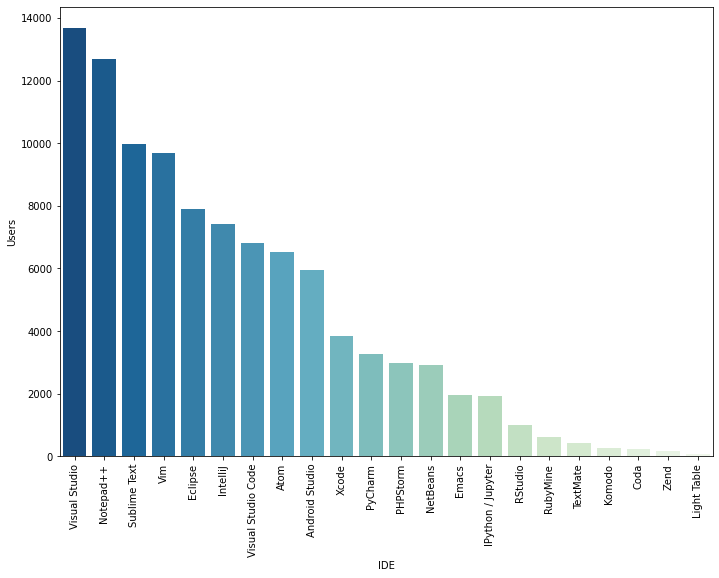

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D1,x='IDE',y='Users',order=D1['IDE'],palette='GnBu_r')
plt.xticks(rotation=90)

Thus, we see that Visual Studio, Notepad++ and Sublime Text are amongst the top IDE tools preferred by the developers.

# [HaveWorkedLanguage] Segregation, Cleaning and Analysis

In [13]:
A = {}
J = list()
for i in dataT['HaveWorkedLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [14]:
A

{'Swift': 2335,
 'JavaScript': 22297,
 'Python': 11344,
 'Ruby': 3243,
 'SQL': 18269,
 'Java': 14211,
 'PHP': 9993,
 'Matlab': 1511,
 'R': 1573,
 'Rust': 404,
 'CoffeeScript': 1169,
 'Clojure': 380,
 'Elixir': 368,
 'Erlang': 272,
 'Haskell': 624,
 'C#': 12215,
 'Objective-C': 2317,
 'Assembly': 1743,
 'C': 6717,
 'C++': 7839,
 'VB.NET': 2197,
 'Perl': 1523,
 'Scala': 1277,
 'F#': 445,
 'TypeScript': 3416,
 'Lua': 1009,
 'VBA': 1489,
 'Groovy': 1173,
 'Go': 1525,
 'nan': 473,
 'Smalltalk': 253,
 'Visual Basic 6': 1004,
 'Common Lisp': 263,
 'Dart': 139,
 'Julia': 129,
 'Hack': 100}

In [15]:
D2 = pd.Series(A, name = 'Languages Already Worked')

In [16]:
D2 = D2.drop('nan')

In [17]:
D2 = D2.to_frame()

In [18]:
D2 = D2.reset_index(level=0)

In [19]:
D2.columns=['Language','Users']

In [20]:
D2 = D2.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'SQL'),
  Text(2, 0, 'Java'),
  Text(3, 0, 'C#'),
  Text(4, 0, 'Python'),
  Text(5, 0, 'PHP'),
  Text(6, 0, 'C++'),
  Text(7, 0, 'C'),
  Text(8, 0, 'TypeScript'),
  Text(9, 0, 'Ruby'),
  Text(10, 0, 'Swift'),
  Text(11, 0, 'Objective-C'),
  Text(12, 0, 'VB.NET'),
  Text(13, 0, 'Assembly'),
  Text(14, 0, 'R'),
  Text(15, 0, 'Go'),
  Text(16, 0, 'Perl'),
  Text(17, 0, 'Matlab'),
  Text(18, 0, 'VBA'),
  Text(19, 0, 'Scala'),
  Text(20, 0, 'Groovy'),
  Text(21, 0, 'CoffeeScript'),
  Text(22, 0, 'Lua'),
  Text(23, 0, 'Visual Basic 6'),
  Text(24, 0, 'Haskell'),
  Text(25, 0, 'F#'),
  Text(26, 0, 'Rust'),
  Text(27, 0, 'Clojure'),
  Text(28, 0, 'Elixir'),
  Text(29, 0, 'Erlang'),
  Text(30, 0, 'Common Lisp'),
  Text(31, 0, 'Smalltalk'),
  Text(32, 0, 'Dart'),
  Text(33, 0, 'Julia'),
  Tex

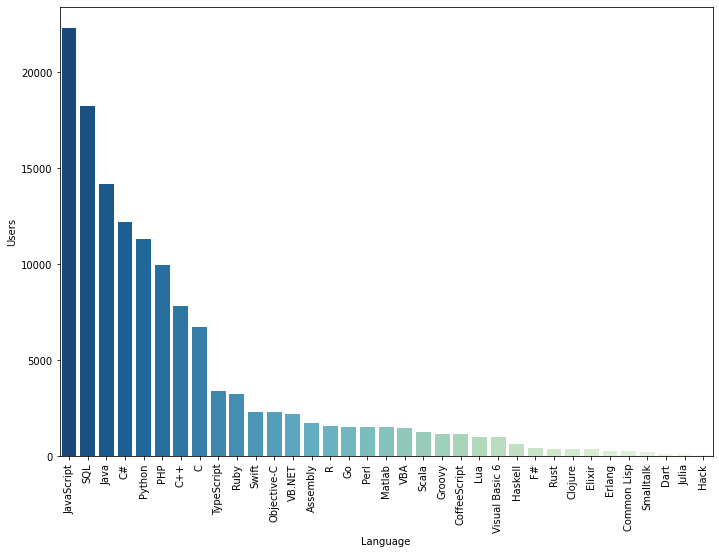

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D2,x='Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

Thus we see Javascript is the most commonly used language amongst the developers

# [WantWorkLanguage] Segregation,Cleaning and Analysis

In [22]:
A = {}
J = list()
for i in dataT['WantWorkLanguage']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [23]:
A

{'Swift': 4464,
 'Java': 9750,
 'Python': 12219,
 'Ruby': 3871,
 'SQL': 10936,
 'C': 4679,
 'Rust': 2670,
 'Matlab': 883,
 'R': 2551,
 'Clojure': 1280,
 'Elixir': 1542,
 'Erlang': 1030,
 'Haskell': 2259,
 'TypeScript': 5622,
 'JavaScript': 15929,
 'Julia': 505,
 'Scala': 3075,
 'F#': 2009,
 'Go': 5684,
 'C#': 9974,
 'Objective-C': 1803,
 'Assembly': 1856,
 'C++': 7369,
 'VB.NET': 770,
 'Perl': 1046,
 'Hack': 322,
 'PHP': 5194,
 'Lua': 1084,
 'Groovy': 844,
 'nan': 3105,
 'CoffeeScript': 1004,
 'Common Lisp': 629,
 'Dart': 487,
 'Smalltalk': 349,
 'VBA': 412,
 'Visual Basic 6': 270}

In [24]:
D3 = pd.Series(A,name ='Want to Work Language')

In [25]:
D3 = D3.drop('nan')

In [26]:
D3 = D3.to_frame()

In [27]:
D3 = D3.reset_index(level=0)

In [28]:
D3.columns=['Want Language','Users']

In [29]:
D3= D3.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'JavaScript'),
  Text(1, 0, 'Python'),
  Text(2, 0, 'SQL'),
  Text(3, 0, 'C#'),
  Text(4, 0, 'Java'),
  Text(5, 0, 'C++'),
  Text(6, 0, 'Go'),
  Text(7, 0, 'TypeScript'),
  Text(8, 0, 'PHP'),
  Text(9, 0, 'C'),
  Text(10, 0, 'Swift'),
  Text(11, 0, 'Ruby'),
  Text(12, 0, 'Scala'),
  Text(13, 0, 'Rust'),
  Text(14, 0, 'R'),
  Text(15, 0, 'Haskell'),
  Text(16, 0, 'F#'),
  Text(17, 0, 'Assembly'),
  Text(18, 0, 'Objective-C'),
  Text(19, 0, 'Elixir'),
  Text(20, 0, 'Clojure'),
  Text(21, 0, 'Lua'),
  Text(22, 0, 'Perl'),
  Text(23, 0, 'Erlang'),
  Text(24, 0, 'CoffeeScript'),
  Text(25, 0, 'Matlab'),
  Text(26, 0, 'Groovy'),
  Text(27, 0, 'VB.NET'),
  Text(28, 0, 'Common Lisp'),
  Text(29, 0, 'Julia'),
  Text(30, 0, 'Dart'),
  Text(31, 0, 'VBA'),
  Text(32, 0, 'Smalltalk'),
  Text(33, 0, 'Hack'),
  Text(34, 0, '

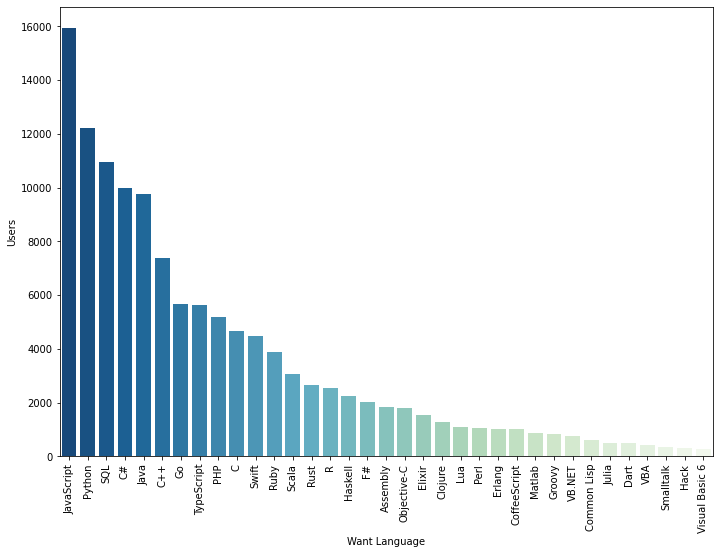

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D3,x='Want Language',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

Most of the developers aspire to learn Javascript

# [WorkedDatabase] Segregation,Cleaning and Analysis

In [31]:
A = {}
J = list()
for i in dataT['HaveWorkedDatabase']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [32]:
A

{'nan': 7026,
 'MySQL': 16001,
 'SQLite': 7699,
 'MongoDB': 6071,
 'Redis': 4083,
 'SQL Server': 11129,
 'PostgreSQL': 7673,
 'Oracle': 4758,
 'Cassandra': 882}

In [33]:
D4= pd.Series(A,name="Have Worked Database")

In [34]:
D4 = D4.drop('nan')

In [35]:
D4 = D4.to_frame()

In [36]:
D4 =D4.reset_index(level=0)

In [37]:
D4.columns=['Database Worked','Users']

<AxesSubplot:xlabel='Database Worked', ylabel='Users'>

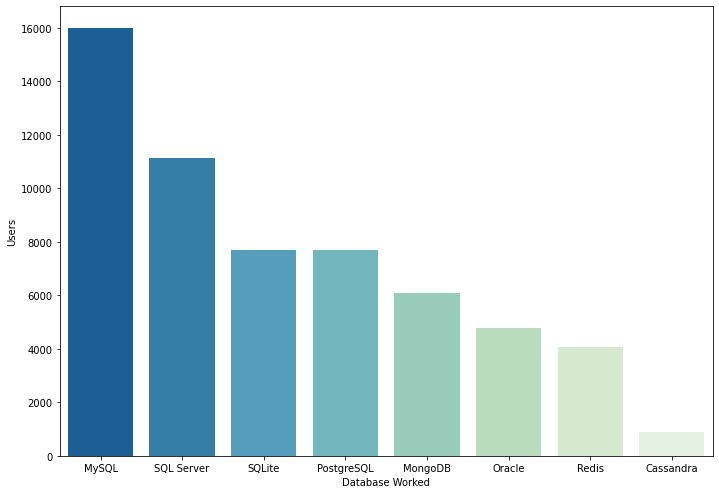

In [38]:
D4 = D4.sort_values(by='Users',ascending=False)
fig,ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D4,x='Database Worked',y ='Users',palette='GnBu_r')

This, we see SQL and SQL Server are amongst the most indemand Database Languages

# [WantDatabase] Segregation,Cleaning,Analysis

In [39]:
A = {}
J = list()
for i in dataT['WantWorkDatabase']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [40]:
D5 = pd.Series(A,name ="Want Work Database")

In [41]:
D5 = D5.drop('nan')

In [42]:
D5 = D5.to_frame()

In [43]:
D5 =D5.reset_index(level=0)

In [44]:
D5.columns=['Want Database', 'Users']

In [45]:
D5 = D5.sort_values(by='Users',ascending=False)

<AxesSubplot:xlabel='Want Database', ylabel='Users'>

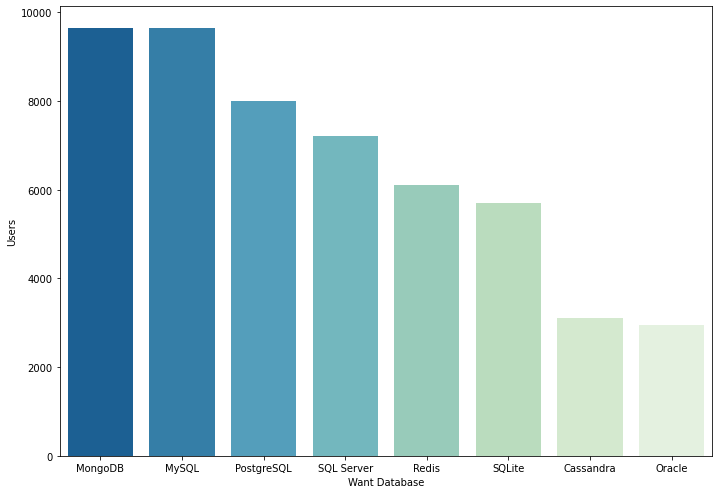

In [46]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7, 8.27)
s.barplot(data=D5,x='Want Database',y='Users',palette='GnBu_r')


Hence, MongoDB iscoming up to become the most indemand database language that developers want to use

In [47]:
A = {}
J = list()
for i in dataT['HaveWorkedPlatform']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [48]:
A

{'iOS': 4717,
 'Amazon Web Services (AWS)': 8085,
 'nan': 7303,
 'Windows Desktop': 11676,
 'Linux Desktop': 9394,
 'Mac OS': 5281,
 'Android': 8093,
 'Microsoft Azure': 3306,
 'Windows Phone': 1110,
 'Raspberry Pi': 4595,
 'WordPress': 4451,
 'Arduino': 2927,
 'Serverless': 604,
 'SharePoint': 1064,
 'Mainframe': 392,
 'Salesforce': 747}

In [49]:
D6 = pd.Series(A,name ='Have Worked Platform')

In [50]:
D6=D6.drop('nan')

In [51]:
D6

iOS                           4717
Amazon Web Services (AWS)     8085
Windows Desktop              11676
Linux Desktop                 9394
Mac OS                        5281
Android                       8093
Microsoft Azure               3306
Windows Phone                 1110
Raspberry Pi                  4595
WordPress                     4451
Arduino                       2927
Serverless                     604
SharePoint                    1064
Mainframe                      392
Salesforce                     747
Name: Have Worked Platform, dtype: int64

In [52]:
D6= D6.to_frame()

In [53]:
D6=D6.reset_index(level=0)
D6

,index,Have Worked Platform
0,iOS,4717
1,Amazon Web Services (AWS),8085
2,Windows Desktop,11676
3,Linux Desktop,9394
4,Mac OS,5281
5,Android,8093
6,Microsoft Azure,3306
7,Windows Phone,1110
8,Raspberry Pi,4595
9,WordPress,4451


In [54]:
D6.columns=['Platform Worked','Users']

In [55]:
D6=D6.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Windows Desktop'),
  Text(1, 0, 'Linux Desktop'),
  Text(2, 0, 'Android'),
  Text(3, 0, 'Amazon Web Services (AWS)'),
  Text(4, 0, 'Mac OS'),
  Text(5, 0, 'iOS'),
  Text(6, 0, 'Raspberry Pi'),
  Text(7, 0, 'WordPress'),
  Text(8, 0, 'Microsoft Azure'),
  Text(9, 0, 'Arduino'),
  Text(10, 0, 'Windows Phone'),
  Text(11, 0, 'SharePoint'),
  Text(12, 0, 'Salesforce'),
  Text(13, 0, 'Serverless'),
  Text(14, 0, 'Mainframe')])

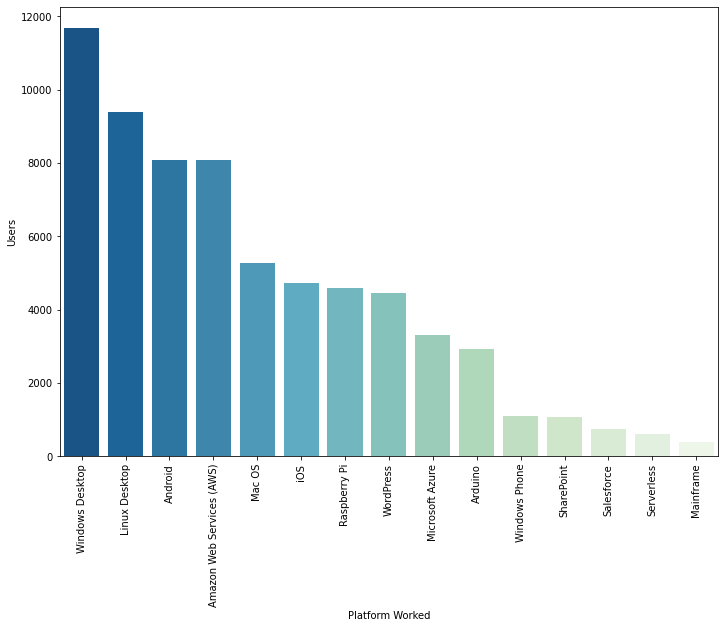

In [56]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D6,x='Platform Worked',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

hence, Windows Desktop is the most popular Platform to work for Mobile Developers.

# [WantWorkPlatform] Segregation,Cleaning and Analysis

In [57]:
A = {}
J = list()
for i in dataT['WantWorkPlatform']:
    x = i
    x = str(x)
    L = x.split(';')
    
    for k in L:
        J.append(k.strip())
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1;
    J.clear()

In [58]:
A

{'iOS': 7139,
 'Linux Desktop': 9134,
 'Raspberry Pi': 7911,
 'Amazon Web Services (AWS)': 10593,
 'nan': 8474,
 'Windows Desktop': 7497,
 'Mac OS': 5342,
 'Arduino': 4554,
 'Serverless': 1843,
 'Microsoft Azure': 4427,
 'Android': 10855,
 'Windows Phone': 1380,
 'WordPress': 2290,
 'Salesforce': 617,
 'Mainframe': 396,
 'SharePoint': 649}

In [59]:
D7 = pd.Series(A,name='Want Work Platform')

In [60]:
D7 = D7.drop('nan')

In [61]:
D7 = D7.to_frame()

In [62]:
D7 =D7.reset_index(level=0)
D7.columns=['Want Platform','Users']
D7

,Want Platform,Users
0,iOS,7139
1,Linux Desktop,9134
2,Raspberry Pi,7911
3,Amazon Web Services (AWS),10593
4,Windows Desktop,7497
5,Mac OS,5342
6,Arduino,4554
7,Serverless,1843
8,Microsoft Azure,4427
9,Android,10855


In [63]:
D7=D7.sort_values(by='Users',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Amazon Web Services (AWS)'),
  Text(2, 0, 'Linux Desktop'),
  Text(3, 0, 'Raspberry Pi'),
  Text(4, 0, 'Windows Desktop'),
  Text(5, 0, 'iOS'),
  Text(6, 0, 'Mac OS'),
  Text(7, 0, 'Arduino'),
  Text(8, 0, 'Microsoft Azure'),
  Text(9, 0, 'WordPress'),
  Text(10, 0, 'Serverless'),
  Text(11, 0, 'Windows Phone'),
  Text(12, 0, 'SharePoint'),
  Text(13, 0, 'Salesforce'),
  Text(14, 0, 'Mainframe')])

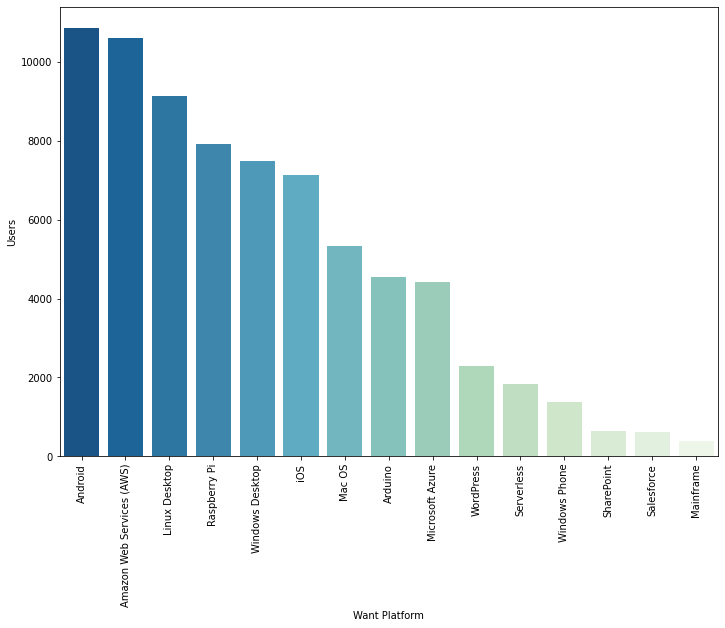

In [64]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D7,x='Want Platform',y='Users',palette='GnBu_r')
plt.xticks(rotation=90)

Hence, we see that Android, AWS, Linux Desktop are amongst the top platforms that users want to learn

# ImportantBenefits Analysis

In [65]:
A=dict()
J=list()
for i in data['ImportantBenefits']:
    x=i
    x=str(x)
    J=x.split('; ')
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1
    J.clear()

In [66]:
D8 = pd.Series(A,name="Important Benefits")
D8 = D8.drop('nan')
D8 = D8.to_frame()
D8 = D8.reset_index(level=0)
D8.columns=['Important Benefits','Most Valued']
D8 = D8.sort_values(by='Most Valued',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Vacation/days off'),
  Text(1, 0, 'Remote options'),
  Text(2, 0, 'Health benefits'),
  Text(3, 0, 'Expected work hours'),
  Text(4, 0, 'Equipment'),
  Text(5, 0, 'Professional development sponsorship'),
  Text(6, 0, 'Annual bonus'),
  Text(7, 0, 'Retirement'),
  Text(8, 0, 'Education sponsorship'),
  Text(9, 0, 'Meals'),
  Text(10, 0, 'Stock options'),
  Text(11, 0, 'Long-term leave'),
  Text(12, 0, 'Private office'),
  Text(13, 0, 'Child/elder care'),
  Text(14, 0, 'Other'),
  Text(15, 0, 'Charitable match'),
  Text(16, 0, 'None of these')])

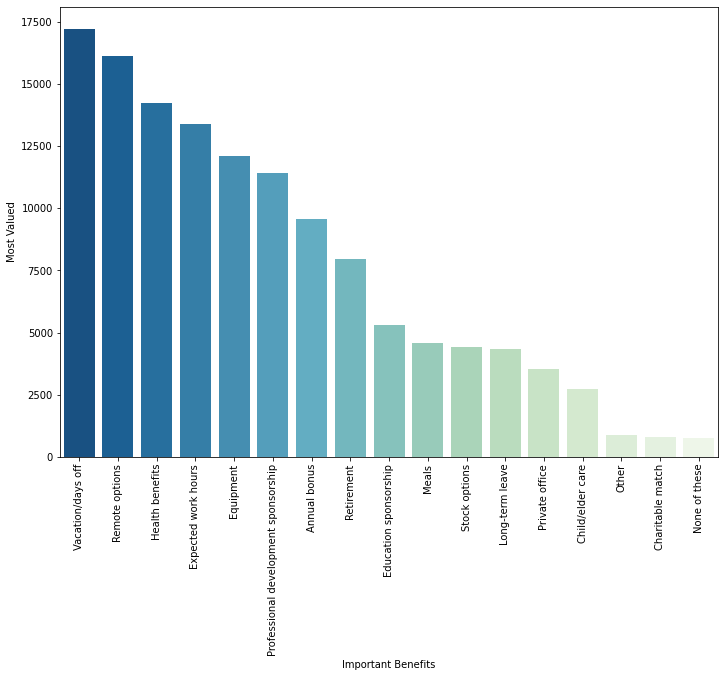

In [67]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D8,x='Important Benefits',y='Most Valued',palette='GnBu_r')
plt.xticks(rotation=90)

# JobProfile Analysis

In [68]:
A=dict()
J=list()
for i in data['JobProfile']:
    x=i
    x=str(x)
    J=x.split('; ')
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1
    J.clear()

In [69]:
D9 = pd.Series(A,name="Job Profile Sites")
D9 = D9.drop('nan')
D9 = D9.to_frame()
D9 = D9.reset_index(level=0)
D9.columns=['Sites for Job','Most Valued']
D9 = D9.sort_values(by='Most Valued',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'LinkedIn'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Monster'),
  Text(3, 0, 'Indeed'),
  Text(4, 0, 'Naukri'),
  Text(5, 0, 'Xing'),
  Text(6, 0, 'Glassdoor'),
  Text(7, 0, 'Dice'),
  Text(8, 0, 'Hired.com'),
  Text(9, 0, 'Reed.co.uk'),
  Text(10, 0, 'CW_Jobs'),
  Text(11, 0, 'JobSite.co.uk'),
  Text(12, 0, 'Pracuj'),
  Text(13, 0, 'Total_Jobs'),
  Text(14, 0, 'StepStone'),
  Text(15, 0, 'Talent.io'),
  Text(16, 0, 'Workopolis'),
  Text(17, 0, 'Remix_jobs'),
  Text(18, 0, 'TripleByte')])

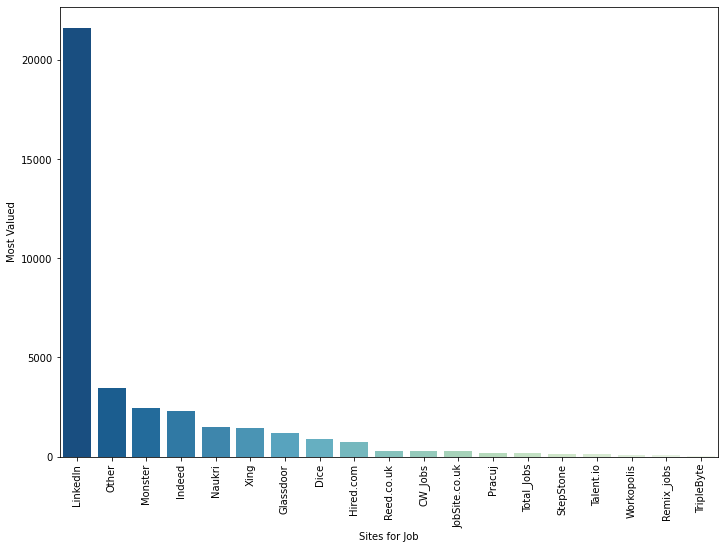

In [70]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D9,x='Sites for Job',y='Most Valued',palette='GnBu_r')
plt.xticks(rotation=90)

Very Clear Analysis, Linkedin is the most sought after website to upload job profile.

# EducationTypes Analysis

In [71]:
A=dict()
J=list()
for i in data['EducationTypes']:
    x=i
    x=str(x)
    J=x.split('; ')
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1
    J.clear()

In [72]:
D10 = pd.Series(A,name="Education Types")
D10 = D10.drop('nan')
D10 = D10.to_frame()
D10 = D10.reset_index(level=0)
D10.columns=['Education Types','Most Valued']
D10 = D10.sort_values(by='Most Valued',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Self-taught'),
  Text(1, 0, 'Online course'),
  Text(2, 0, 'On-the-job training'),
  Text(3, 0, 'Open source contributions'),
  Text(4, 0, 'Hackathon'),
  Text(5, 0, 'Coding competition'),
  Text(6, 0, 'Part-time/evening course'),
  Text(7, 0, 'Industry certification'),
  Text(8, 0, 'Bootcamp')])

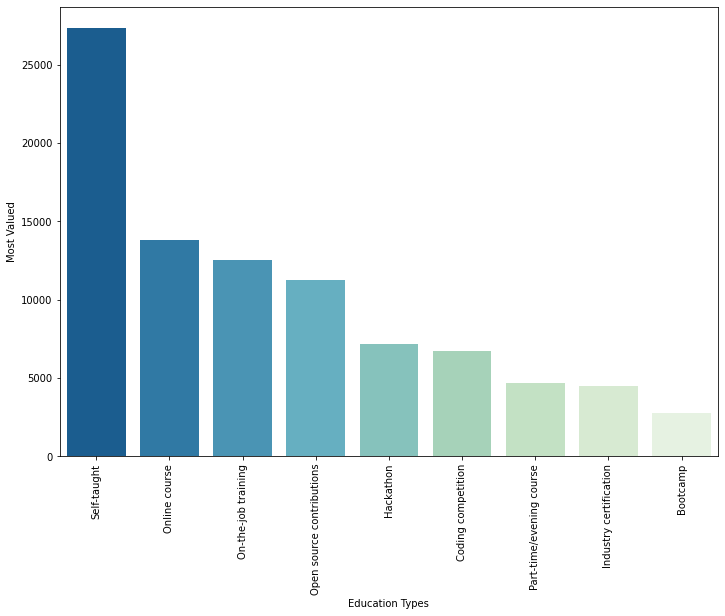

In [73]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D10, x='Education Types' ,y='Most Valued' ,palette='GnBu_r')
plt.xticks(rotation=90)

# DeveloperType Analysis and Segregation

In [74]:
A=dict()
J=list()
for i in data['DeveloperType']:
    x=i
    x=str(x)
    J=x.split('; ')
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1
    J.clear()

In [75]:
A

{'nan': 15267,
 'Other': 2694,
 'Mobile developer': 8326,
 'Graphics programming': 1731,
 'Desktop applications developer': 10435,
 'Web developer': 26235,
 'Embedded applications/devices developer': 3352,
 'DevOps specialist': 4015,
 'Quality assurance engineer': 1252,
 'Data scientist': 3045,
 'Machine learning specialist': 1379,
 'Developer with a statistics or mathematics background': 4091,
 'Database administrator': 5192,
 'Systems administrator': 4086,
 'Graphic designer': 1426}

In [76]:
D11=pd.Series(A,name='Developer Type')
D11=D11.drop('nan')
D11=D11.to_frame()
D11=D11.reset_index(level=0)
D11.columns=['Developer Type','Count']
D11=D11.sort_values(by='Count',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Web developer'),
  Text(1, 0, 'Desktop applications developer'),
  Text(2, 0, 'Mobile developer'),
  Text(3, 0, 'Database administrator'),
  Text(4, 0, 'Developer with a statistics or mathematics background'),
  Text(5, 0, 'Systems administrator'),
  Text(6, 0, 'DevOps specialist'),
  Text(7, 0, 'Embedded applications/devices developer'),
  Text(8, 0, 'Data scientist'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Graphics programming'),
  Text(11, 0, 'Graphic designer'),
  Text(12, 0, 'Machine learning specialist'),
  Text(13, 0, 'Quality assurance engineer')])

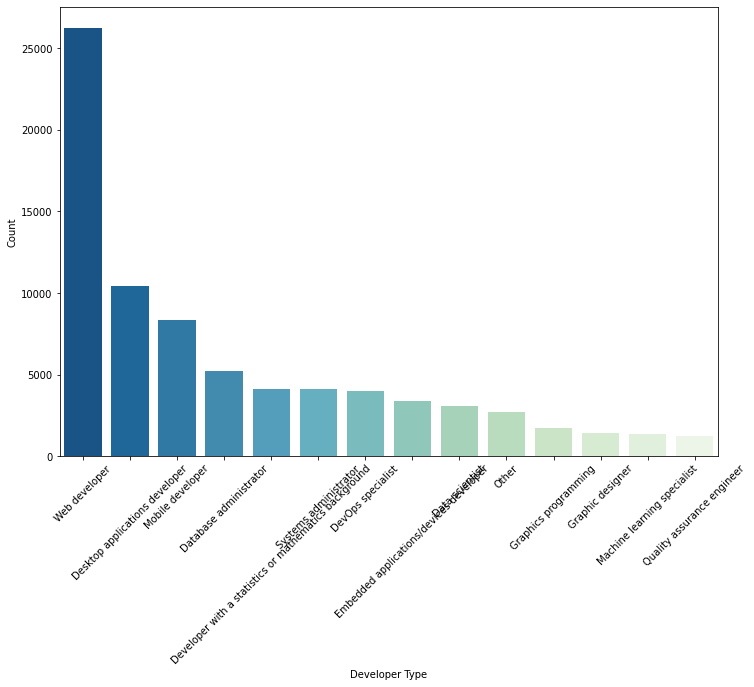

In [77]:
fig,ax = plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D11, x='Developer Type' ,y='Count' ,palette='GnBu_r')
plt.xticks(rotation=45)

# Non-Developer Types Analysis

In [78]:
A=dict()
J=list()
for i in data['NonDeveloperType']:
    x=i
    x=str(x)
    J=x.split('; ')
    for v in J:
        if v not in A:
            A[v]=1
        else:
            A[v]=A[v]+1
    J.clear()

In [79]:
A


{'.': 1,
 'nan': 46501,
 'Data scientist': 1100,
 'Other': 1558,
 'C-suite executive': 257,
 'Product manager': 365,
 'Educator or academic': 732,
 'Analyst or consultant': 1897,
 'Marketing or sales manager': 152,
 'Designer or illustrator': 600,
 'Elected official': 34}

In [80]:
D12=pd.Series(A,name='Non-Developer Type')
D12=D12.drop('nan')
D12=D12.drop('.')
D12=D12.to_frame()
D12=D12.reset_index(level=0)
D12.columns=['Non-Developer Type','Count']
D12=D12.sort_values(by='Count',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Analyst or consultant'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Data scientist'),
  Text(3, 0, 'Educator or academic'),
  Text(4, 0, 'Designer or illustrator'),
  Text(5, 0, 'Product manager'),
  Text(6, 0, 'C-suite executive'),
  Text(7, 0, 'Marketing or sales manager'),
  Text(8, 0, 'Elected official')])

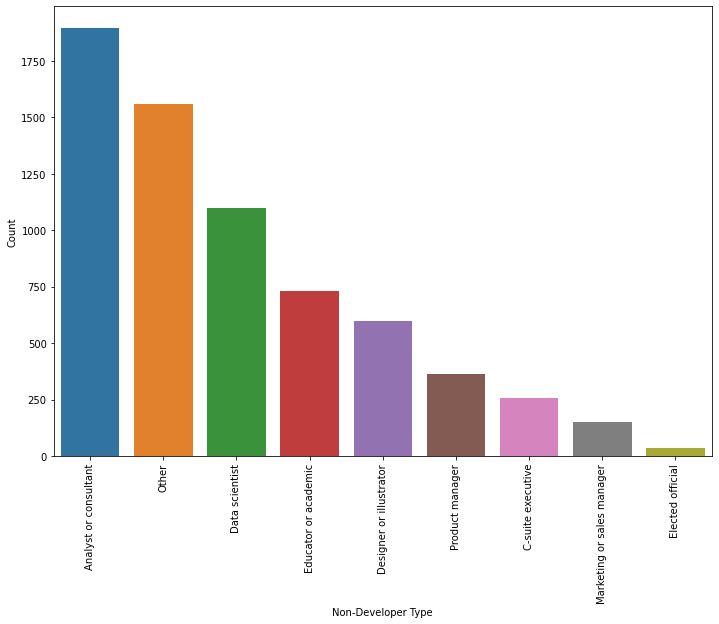

In [81]:
fig,ax=plt.subplots()
fig.set_size_inches(11.8,8.27)
s.barplot(data=D12,x='Non-Developer Type',y='Count')
D12=D12.sort_values(by='Count',ascending=False)
plt.xticks(rotation=90)